## Transcribe Audio

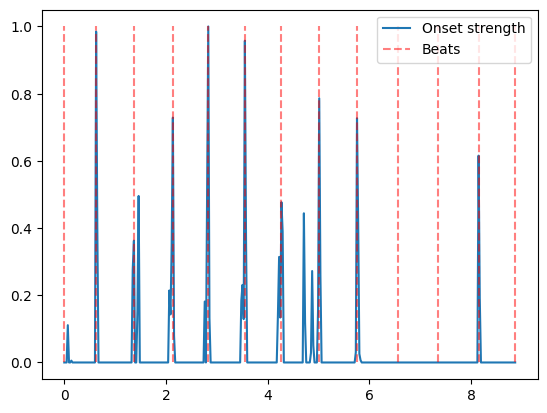

In [3]:
import librosa
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np


y, sr = librosa.load('/home/willie/Projects/Mark_E_Markov/v2/audio/c_scale.wav')
# y, sr = librosa.load(librosa.ex('trumpet'))


tempo, beats = librosa.beat.beat_track(
                y=y, sr=sr, trim=False
            )
hop_length = 512
onset_env = librosa.onset.onset_strength(y=y, sr=sr,
                                         aggregate=np.median)
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)

fig, ax = plt.subplots()

ax.plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax.vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax.legend()

y_clicks = librosa.clicks(frames=beats, length=len(y), sr=sr)
Audio(data=y + y_clicks, rate=sr, embed=True, autoplay=True)
